<a href="https://colab.research.google.com/github/smaciasg/Ejercicios_DataScience_Coding_Dojo/blob/main/Ejercicio_de_pr%C3%A1ctica_sobre_el_%C3%A1rbol_de_clasificaci%C3%B3n_y_matriz_de_confusi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1) Importar las librerías necesarias**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
#Librerías para el procesamiento
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
#Librerías de modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#Matriz de confusión
from sklearn.metrics import plot_confusion_matrix

###**2) Cargar datos y explorarlos**

In [4]:
cancer = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 7 - MODELOS DE PREDICCIÓN CLASIFICACIÓN/cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer.info()
#Solo hay una columna tipo objeto que es la columna categórica que se desea predecir que es dignosis, se va a transformar en una columna numérica entre 0 y 1 para 0:BENIGNO / 1:MALIGNO
# El resto de columnas son float y no hay datos nulos, en este caso lo recomedable es escalar los datos numéricos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

###**3) Creación del modelo de validación, la matriz de características y el vector obejtivo**

**Transformación de las categorías de la columna diagnosis a valores**

In [7]:
cancer['diagnosis'] = cancer['diagnosis'].replace({'M':1, 'B':0})

In [8]:
cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

**Creación de la matriz de características y el vector objetivo**

In [9]:
#Dado que la columna ID es un valor único para cada caso se procede al retiro del mismo
X = cancer.drop(columns=['diagnosis', 'id'])
y = cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

###**4) Transformación de los datos**

**Instanciamos el transformador**

In [10]:
#Dado que toda la matriz de características es numérica no es necesario usar un selector de columnas
scaler = StandardScaler()

**Ajustado  entrenamiento del modelo con los datos de entranemiento**

In [11]:
scaler.fit(X_train)

StandardScaler()

**Tranformación de las matrices de entranmiento y prueba**

In [12]:
train_scaler = scaler.transform(X_train)
test_scaler = scaler.transform(X_test)

In [13]:
train_scaler

array([[-0.34913849, -1.43851335, -0.41172595, ..., -0.91671059,
        -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, ...,  1.43655962,
         1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, ..., -0.7237126 ,
         0.53496977, -0.61934827],
       ...,
       [ 0.04739597, -0.56293662, -0.06529202, ..., -1.23262438,
        -0.68282718, -1.261137  ],
       [-0.04040808,  0.09966199, -0.03151368, ...,  1.08847951,
         0.48944465,  1.26159953],
       [-0.5502381 ,  0.31264011, -0.6040977 , ..., -0.59582424,
        -0.29911546, -0.82948141]])

In [14]:
test_scaler

array([[-0.46809882, -0.14171322, -0.44468042, ..., -0.17331092,
         0.22117163,  0.23655985],
       [ 1.36445686,  0.49958757,  1.30643802, ...,  1.0294302 ,
        -0.53161875, -0.99405722],
       [ 0.37878549,  0.06653205,  0.40430925, ...,  0.6020997 ,
        -0.06661217, -0.17972015],
       ...,
       [-0.87313045, -0.5605702 , -0.86361419, ..., -0.59582424,
         0.19515727, -0.25830652],
       [ 1.6108747 ,  0.69836715,  1.57007383, ...,  1.96023373,
        -0.17879907, -0.40978461],
       [-1.09405679, -1.65149148, -1.07658249, ..., -0.71003802,
         0.09597755, -0.34885169]])

In [15]:
X_test_df = pd.DataFrame(test_scaler,columns=X_test.columns)
X_test_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.468099,-0.141713,-0.444680,-0.485979,0.293371,0.064062,-0.094503,-0.252114,0.465735,0.155596,...,-0.260021,-0.144002,-0.328029,-0.346843,0.491380,-0.066543,-0.003007,-0.173311,0.221172,0.236560
1,1.364457,0.499588,1.306438,1.334411,-0.391720,0.007650,0.261460,0.840001,-0.814742,-1.107774,...,1.810752,0.178262,1.786327,1.757553,-0.513093,-0.094689,0.005044,1.029430,-0.531619,-0.994057
2,0.378785,0.066532,0.404309,0.263973,0.977745,0.385023,0.753059,0.875964,0.488134,-0.643707,...,0.638221,0.081915,0.545259,0.499981,1.008706,-0.055820,0.560546,0.602100,-0.066612,-0.179720
3,-0.487926,-0.359424,-0.429027,-0.525583,0.705429,0.565928,-0.128126,-0.522366,0.040153,1.165461,...,-0.697626,-0.431382,-0.522967,-0.633959,0.594845,0.101666,-0.137857,-0.605303,-0.523489,0.583365
4,-0.731511,-1.126145,-0.709964,-0.707875,0.306987,0.184665,-0.255992,-0.576575,0.066286,0.722173,...,-0.827442,-0.967936,-0.850791,-0.736690,0.142186,-0.240782,-0.442779,-0.675541,-0.892568,-0.114232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.146530,-0.936832,0.160034,-0.008481,1.264394,0.610668,0.155244,0.605447,1.178770,0.118194,...,0.026830,-1.207142,0.076075,-0.124200,-0.150966,0.409936,-0.036719,0.420290,0.443920,0.078818
139,0.092714,0.241647,0.107307,-0.034322,0.226725,0.351954,0.388817,0.318800,0.559064,0.284427,...,0.443497,0.766312,0.333370,0.301603,1.034572,1.057973,1.152276,1.105573,3.048607,1.022424
140,-0.873130,-0.560570,-0.863614,-0.791297,0.870252,-0.475931,-0.726068,-0.606721,-0.321964,0.109882,...,-0.796035,0.155006,-0.815981,-0.712601,0.245651,-0.666999,-0.810095,-0.595824,0.195157,-0.258307
141,1.610875,0.698367,1.570074,1.699557,0.197344,0.003760,0.769615,1.249081,-0.814742,-1.199202,...,2.325828,0.892560,2.418969,2.699846,0.862130,0.450815,1.356061,1.960234,-0.178799,-0.409785


##**MODELO ÁRBOL DE DECISIONES PARA CLASIFICACIÓN**

###**1) Instanciamos el modelo**

In [16]:
arbol_clasificador = DecisionTreeClassifier(random_state=42)
#Vamos a correr para ver si se sobreajusta y en tal caso se optimiza

###**2) Entrenar el modelo con los datos de entrenamiento**

In [17]:
arbol_clasificador.fit(train_scaler, y_train)

DecisionTreeClassifier(random_state=42)

###**3) Predecir las etiquetas del conjunto de pruebas**

In [18]:
arbol_clasificador.predict(test_scaler)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

###**4) Evaluar el rendimiento del modelo**

In [19]:
train_score = arbol_clasificador.score(train_scaler,y_train)
test_score = arbol_clasificador.score(test_scaler,y_test)
print(f'El score de cojunto de entrenamiento es: {train_score}\nEL escore del conjunto de pruebas es: {test_score}')

El score de cojunto de entrenamiento es: 1.0
EL escore del conjunto de pruebas es: 0.951048951048951


In [20]:
#El modelo se puede estar sobre ajustando vamos a intentar optimizarlo
arbol_clasificador.get_depth()

7

**Función para optimización**

In [21]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, arbol_clasificador.get_depth()))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
score_optimo = []
depth_optimo = {}
for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    score_optimo.append(score)
    depth_optimo[score] = depth

In [22]:
#Valor óptimo de la profundidad es
val_depth_optimo = depth_optimo.get(max(score_optimo))
val_depth_optimo

5

###**5) Optimizar modelo**

In [23]:
#Árbol ajustado con la profundidad óptima encontrada
arbol_clasificador = DecisionTreeClassifier(random_state=42, max_depth=val_depth_optimo)
#Entranmiento del modelo con los datos de entrenamiento
arbol_clasificador.fit(train_scaler, y_train)
#Predicción de clases del conjunto de prueba
arbol_clasificador.predict(X_test)
#Obteción del score de entrenamiento y de prueba
train_score = arbol_clasificador.score(train_scaler,y_train)
test_score = arbol_clasificador.score(test_scaler,y_test)
print(f'El score de cojunto de entrenamiento es: {train_score}\nEL escore del conjunto de pruebas es: {test_score}')

El score de cojunto de entrenamiento es: 0.9953051643192489
EL escore del conjunto de pruebas es: 0.958041958041958


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Si bien no se observa procentualmente hablando una mejoría en gran medida del modelo, al menos ya no está totalmente sobrejustado.

###**MATRIZ DE CONFUSIÓN**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


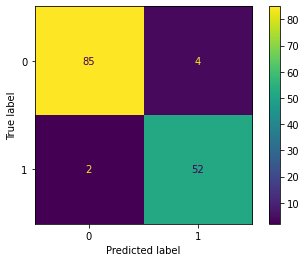

In [41]:
plot_confusion_matrix(arbol_clasificador,test_scaler,y_test)
plt.show()

1. ¿Qué condición (maligno o benigno) se considera la clase positiva en este conjunto de datos?

R/ Positivo se considera maligno y negativo benigno

2. ¿Cuántos falsos positivos había? 

R/ 4

3.  ¿Cuántos falsos negativos había?

R/ 2

4. Para el conjunto de datos de cáncer de mama, ¿cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen.  

R/ Depende, si el tratamiento se asigna solo con esta clasificación, es grava el falso positivo, pues se podría llegar a aplicar un tratamiento agresivo a alguien que no lo requiere, aparte de los gastos que implica para el sistema de salud y una posible demanda. Si se tiene un falso negativo, la persona podría morir. Ambos casos son complejos.

##**MODELO BAGGED TREES**

###**1) Instanciar el modelo**

In [25]:
bagreg = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10 ,random_state=42, bootstrap=True)

###**2) Entrenar el modelo con los datos de entrenamiento**

In [26]:
bagreg.fit(train_scaler,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

###**3) Predecir los valores para y desde el conjunto de pruebas**

In [27]:
bagreg.predict(test_scaler)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

###**4) Evaluar el rendimiento del modelo**

In [28]:
train_score_ba = bagreg.score(train_scaler,y_train)
test_score_ba = bagreg.score(test_scaler,y_test)
print(f'El score de cojunto de entrenamiento es: {train_score_ba}\nEL escore del conjunto de pruebas es: {test_score_ba}')

El score de cojunto de entrenamiento es: 0.9929577464788732
EL escore del conjunto de pruebas es: 0.951048951048951


Al evaluar el modelo con bootstrap = False, el score de entrenamiento se vuelve 1, lo que indica que el modelo se estaría sobreajustando.

###**MATRIZ DE CONFUSIÓN**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


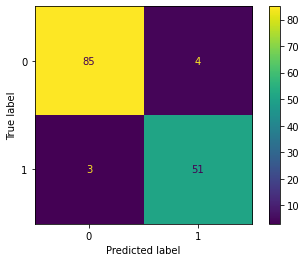

In [40]:
plot_confusion_matrix(bagreg,test_scaler,y_test)
plt.show()

##**MODELO BOSQUES ALEATORIOS PARA CLASIFICACIÓN**

###**1) Instanciar el modelo**

In [29]:
rf_clasificador = RandomForestClassifier(random_state=42)
#Por ahora no se optimiza, se espera el resultado de los scores de entrenamiento y de prueba

###**2) Entrenar el modelo con los datos de entrenamiento**

In [30]:
rf_clasificador.fit(train_scaler,y_train)

RandomForestClassifier(random_state=42)

###**3) Predecir las etiquetas con el conjunto de pruebas**

In [31]:
rf_clasificador.predict(test_scaler)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

###**4) Evaluar el rendimiento del modelo**

In [32]:
train_score_rf = rf_clasificador.score(train_scaler,y_train)
test_score_rf = rf_clasificador.score(test_scaler,y_test)
print(f'El score de cojunto de entrenamiento es: {train_score_rf}\nEL escore del conjunto de pruebas es: {test_score_rf}')

El score de cojunto de entrenamiento es: 1.0
EL escore del conjunto de pruebas es: 0.965034965034965


Se observa un modelo sobreajustado, por lo que se recomienda el cambio de algún hiperparámetro, a pesar de esto el score del cojunto de pruebas es igualmente alto.

In [33]:
rf_clasificador.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Optimizar el bosque aleatorio**

Para ello vamos a comenzar cambiando la profundidad a 3, para ver si esto podría funcionar

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grip_params = {
    'max_depth': [5,10,15],
    'n_estimators': [10,50,100]
}

grid = GridSearchCV(rf_clasificador, grip_params, cv=5)
grid.fit(train_scaler,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [36]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [37]:
rf_clasificador = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50)
rf_clasificador.fit(train_scaler,y_train)
rf_clasificador.predict(test_scaler)
train_score_rf = rf_clasificador.score(train_scaler,y_train)
test_score_rf = rf_clasificador.score(test_scaler,y_test)
print(f'El score de cojunto de entrenamiento es: {train_score_rf}\nEL escore del conjunto de pruebas es: {test_score_rf}')

El score de cojunto de entrenamiento es: 0.9929577464788732
EL escore del conjunto de pruebas es: 0.972027972027972


La mejor opción, al menos de las probadas es un boque aleatorio con una produndidad de 5 y 50 estimadores

###**MATRIZ DE CONFUSIÓN**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


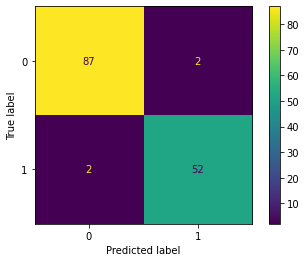

In [43]:
plot_confusion_matrix(rf_clasificador,test_scaler,y_test)
plt.show()